# Networks 

In this lab you'll do some exercises to familiarise yourself with network properties and concepts.

In [ ]:
%matplotlib inline
!pip3 install networkx

In [1]:
import itertools
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

**Exploring classes in python.** <br>
<p>
dir(class_instance) will show you the available attributes of a class. <br>
attributes include the methods (functions), and variables of the class.<br>
networkx is a class, and both Graph() and DiGraph() are classes.
</p>

Run the following cell to see which variables and methods the networkx class provides:


In [2]:
dir(nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__author__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 

<p>Ok, thats a lot of attributes. </p>

We will work with **Graph()** (undirected) and **DiGraph()** (directed) graph classes today. Let's see what attributes the Graph() class has:


In [3]:
graphA = nx.Graph()
dir(graphA)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

We can try a few of these out to see how they work. Run the cell below.

In [6]:
print(graphA.is_directed())
print(graphA.size())

graphA.add_edge('B', 'C')
print(graphA.size())
print(len(graphA.nodes()))

False
1
2
3


Rather than printing out DiGraph's methods, the following cell will list the attributes which are **exclusive** to Graph or DiGraph.

In [7]:
graphA = nx.Graph()
graphB = nx.DiGraph()

graphA_attributes = set(dir(graphA))
graphB_attributes = set(dir(graphB))

print('\nGraphA (Graph) exclusive attributes:')
print(list(graphA_attributes - graphB_attributes))

print('\nGraphB (DiGraph) exclusive attributes:')
print(list(graphB_attributes - graphA_attributes))



GraphA (Graph) exclusive attributes:
[]

GraphB (DiGraph) exclusive attributes:
['in_degree', 'has_successor', 'out_edges', 'reverse', 'predecessors', 'successors', '_succ', '_pred', 'succ', 'out_degree', 'has_predecessor', 'pred', 'in_edges']


<br>We can see that the directed graph class has a few more methods than the undirected graph.
<br>This is because the directed graph needs to record information about where the edges are pointing, rather than just if an edge exists. 

<br>**Exercise 1(a):**

This exercise is to do by hand, on paper. Given the undirected graph drawn below, write down the adjacency matrix.

<img src="img/small_graph_undirected.png">

**Exercise 1(b):**

This exercise is to do by hand, on paper. Given the directed graph drawn below, write down the adjacency matrix.

<img src="img/small_graph_directed.png">

**Exercise 2:**

Create the above graphs in networkx. use the graph_object.add_edge() method to add edges. 
<br>An example showing how to draw GraphA, and show other representations of the data is given below.

Define an **undirected** networkx graph object and add nodes/edges:

In [14]:
graphA = nx.Graph()
graphA.add_edge('A', 'B')
graphA.add_edge('A', 'C')
graphA.add_edge('B', 'C')
graphA.add_edge('C', 'D')


Define a **directed** networkx graph object and add nodes/edges:

In [15]:
graphB = nx.DiGraph()
graphB.add_edge('A', 'B')
graphB.add_edge('A', 'C')
graphB.add_edge('C', 'B')
graphB.add_edge('C', 'D')
graphB.add_edge('E', 'C')


<br>The following 4 cells show different representations of our graph:<br>

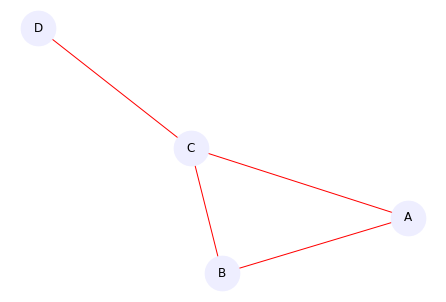

In [16]:
nx.draw_spring(graphA, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')

In [17]:
nx.adjacency_matrix(graphA)

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [18]:
print(nx.adjacency_matrix(graphA))

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1


In [19]:
print(graphA.nodes())
nx.to_numpy_matrix(graphA)

['A', 'B', 'C', 'D']


matrix([[0., 1., 1., 0.],
        [1., 0., 1., 0.],
        [1., 1., 0., 1.],
        [0., 0., 1., 0.]])

network

<br>networkx seems to be using 'numpy' - a popular python library, to store graph data. 
<br>numpy allows matrix and vector operations to be performed quickly and efficiently. This makes sense if our network gets very big! 

Lets also check graphB to see if we created it correctly. Print the adjacency matrix for `graphB` (as above) in the folowing cell:

  (0, 1)	1
  (0, 2)	1
  (2, 1)	1
  (2, 3)	1
  (4, 2)	1


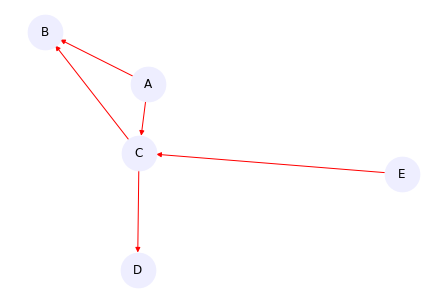

In [26]:
# your commands here.

# nx.draw_spring....
nx.draw_spring(graphB, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')

# nx.adjacency_matrix...
print(nx.adjacency_matrix(graphB))


**Exercise 3:**

Complete the function below to find the degree distrbution for any given graph. You can use the networkx method `graph.degree()`, which returns the number of edges connecting to each node. You should return a tuple of two lists: the first list contains all observed vertex degree values in the graph, and the second contains the counts showing how often a vertex with that degree was observed.

For instance, calling `degree_distribution()` on `graphA` above could return

```([1, 2, 3], [1, 2, 1])```

meaning that there is one vertex with degree 1 (D), two vertices with degree 2 (A and B), and one vertex with degree 3 (C).

These two lists will give us a handy form for plotting the degree distribution.

In [ ]:
# Here's the networkx function `graph.degree()`:
graphA.degree('C')

In [43]:
def degree_distribution(graph):
    """
    For the networkx graph provided, return a tuple of lists, where
    the first list gives all observed vertex degrees, and the second list gives
    the corresponding vertex counts.
    """
    degree_counts = {}
    for node in graph.nodes():
        degree = graph.degree(node)
        
        if degree not in degree_counts:
            degree_counts[degree] = 0
            
        degree_counts[degree] += 1
        
    degree_counts = list(degree_counts.items())
    degree_counts.sort()
    degrees = [x[0] for x in degree_counts]
    counts = [x[1] for x in degree_counts]
    return (degrees, counts)
    

Once you have this function, you can draw the degree distribution with a scatter plot:

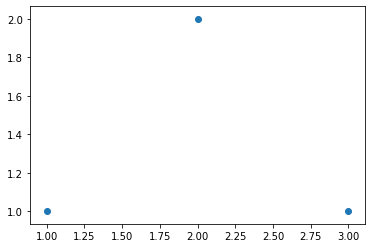

In [44]:
# Graph A:
degrees, counts = degree_distribution(graphA)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

Here are some graphs of types described in lectures. You can generate other graph types with networkx functions described at https://networkx.github.io/documentation/stable/reference/generators.html

A random (Erdos-Renyi) graph:

In [45]:
# 600 nodes, probability of each edge 0.4
random_graph = nx.fast_gnp_random_graph(600, 0.4)

A scale-free graph:

In [46]:
# 600 nodes
scale_free_graph = nx.scale_free_graph(600)

If you are finding the degree distribution correctly, you can plot the distributions for these different graph types:

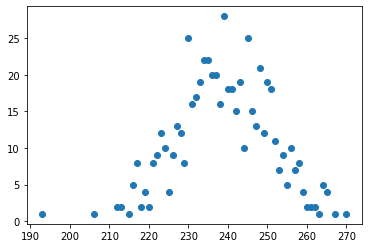

In [47]:
degrees, counts = degree_distribution(random_graph)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

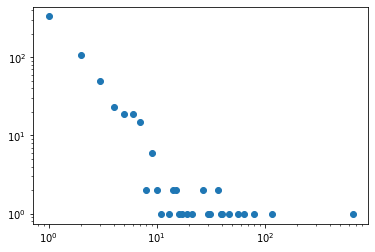

In [49]:
degrees, counts = degree_distribution(scale_free_graph)
fig, ax = plt.subplots()

ax.scatter(degrees, counts)
ax.set_xscale('log')
ax.set_yscale('log')

The plot for the scale-free graph doesn't look very clear as the relationship shown in lectures is on a log-log scale. Try using `ax.set_xscale('log')` and `ax.set_yscale('log')` on your plot to see this relationship more clearly.

**Exercise 4:**

Complete the function below to implement the clustering coefficient calculation described in lectures. This function does exist in networkx, but don't use it - implement it yourself. You can however use the `graph.neighbors()` method from networkx to find all the neighbours of a given node.

You can check that your answer gives the same result as the networkx function `nx.clustering()`.

In [62]:
import itertools

def clustering_coefficient(graph, node_label):
    """
    Calculate and return the clustering coefficient for a node in an undirected graph.
    The clustering coefficient is the number of edges between neighbors 
    divided by the possible number of edges between neighbors.
    """
    # get neighbour nodes
    # work out all possible connections between neighbours
    # check how many of these exist in the graph
    
    neighbour_nodes = list(graph.neighbors(node_label))
    possible_edges = list(itertools.combinations(neighbour_nodes, 2))
    all_edges = list(graph.edges())
    
    actual_edges = 0
    for edge in possible_edges:
        if edge in all_edges:
            actual_edges += 1
            
    print(neighbour_nodes)
    print(possible_edges)
    print(all_edges)
    print(actual_edges)
    
    return actual_edges / len(possible_edges)
    
    
    # Complete this function

In [64]:
import itertools

def clustering_coefficient(graph, node_label):
    """
    Calculate and return the clustering coefficient for a node in an undirected graph.
    The clustering coefficient is the number of edges between neighbors 
    divided by the possible number of edges between neighbors.
    """
    # get neighbour nodes
    # work out all possible connections between neighbours
    # check how many of these exist in the graph
    
    neighbour_nodes = list(graph.neighbors(node_label))
    possible_edges = set(itertools.combinations(neighbour_nodes, 2))
    all_edges = set(graph.edges()) 
    actual_edges = possible_edges & all_edges
       
    return len(actual_edges) / len(possible_edges)
    
    
    # Complete this function

In [65]:
# Should give 0.333333
clustering_coefficient(graphA, 'C')

[('A', 'B')]


0.3333333333333333